In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Nagham\Downloads\Datascience Programming\proj\sleep_health_lifestyle_with_issues.csv")
df2=pd.read_csv(r"C:\Users\Nagham\Downloads\Datascience Programming\proj\new.csv")#has no instead of none and splited

In [2]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539.0,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754.0,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857.0,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886.0,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945.0,Insomnia


In [3]:
df2.shape[0]

408

# Data Preprossing

In [4]:
# Step 1: Split the Blood Pressure column into systolic and diastolic
df[['Systolic', 'Diastolic']] = df['Blood Pressure (systolic/diastolic)'] \
    .str.split('/', expand=True)
#split them to be 2 col

In [5]:
# Step 2: Convert split columns to numeric types
df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')

In [6]:
# Step 3: Calculate derived metric - Pulse Pressure
#another col
df['Pulse Pressure'] = df['Systolic'] - df['Diastolic']

In [7]:
# Step 4: Optional - Categorize blood pressure
def categorize_bp(row):
    if pd.isnull(row['Systolic']) or pd.isnull(row['Diastolic']):
        return 'Unknown'
    elif row['Systolic'] < 90 or row['Diastolic'] < 60:
        return 'Hypotension'
    elif row['Systolic'] <= 120 and row['Diastolic'] <= 80:
        return 'Normal'
    elif row['Systolic'] <= 139 or row['Diastolic'] <= 89:
        return 'Elevated'
    else:
        return 'Hypertension'

#another col
df['BP Category'] = df.apply(categorize_bp, axis=1)

In [8]:
#save
df1=df.to_json('new_splited_sleepdata.json', orient='columns')

In [9]:
df1_after_split = pd.read_json(r"C:\Users\Nagham\Downloads\Datascience Programming\proj\new_splited_sleepdata.json")

In [10]:
#Detect duplicated rows.
s=df2.duplicated().sum()
s

3

In [11]:
# Remove complete duplicate rows
df2.drop_duplicates()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder,Systolic,Diastolic,Pulse Pressure,BP Category
0,1,Male,29,Manual Labor,9.6,5.6,41,7,Obese,124/70,91,8539.0,No,124,70,54,Elevated
1,2,Female,43,Retired,6.1,5.4,41,5,Obese,131/86,81,18754.0,No,131,86,45,Elevated
2,3,Male,44,Retired,7.8,9.3,107,4,Underweight,122/70,81,2857.0,No,122,70,52,Elevated
3,4,Male,29,Office Worker,11.9,NaN,20,10,Obese,124/72,55,6886.0,No,124,72,52,Elevated
4,5,Male,67,Retired,11.8,7.7,19,4,Overweight,133/78,97,14945.0,Insomnia,133,78,55,Elevated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,396,Female,36,Student,10.6,3.7,73,7,Normal,118/66,64,14497.0,Sleep Apnea,118,66,52,Normal
403,397,Female,45,Manual Labor,8.0,NaN,72,8,Obese,132/80,65,12848.0,Insomnia,132,80,52,Elevated
404,398,Female,30,Student,8.9,4.7,58,10,Obese,125/76,66,15255.0,Insomnia,125,76,49,Elevated
405,399,Female,41,Retired,11.6,4.8,73,9,Obese,130/75,75,6567.0,Sleep Apnea,130,75,55,Elevated


In [12]:
df2.reset_index(drop=True)

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder,Systolic,Diastolic,Pulse Pressure,BP Category
0,1,Male,29,Manual Labor,9.6,5.6,41,7,Obese,124/70,91,8539.0,No,124,70,54,Elevated
1,2,Female,43,Retired,6.1,5.4,41,5,Obese,131/86,81,18754.0,No,131,86,45,Elevated
2,3,Male,44,Retired,7.8,9.3,107,4,Underweight,122/70,81,2857.0,No,122,70,52,Elevated
3,4,Male,29,Office Worker,11.9,NaN,20,10,Obese,124/72,55,6886.0,No,124,72,52,Elevated
4,5,Male,67,Retired,11.8,7.7,19,4,Overweight,133/78,97,14945.0,Insomnia,133,78,55,Elevated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,397,Female,45,Manual Labor,8.0,NaN,72,8,Obese,132/80,65,12848.0,Insomnia,132,80,52,Elevated
404,398,Female,30,Student,8.9,4.7,58,10,Obese,125/76,66,15255.0,Insomnia,125,76,49,Elevated
405,399,Female,41,Retired,11.6,4.8,73,9,Obese,130/75,75,6567.0,Sleep Apnea,130,75,55,Elevated
406,400,Male,37,Retired,9.5,5.9,41,6,Normal,118/70,51,18079.0,No,118,70,48,Normal


In [13]:
missing =pd.read_csv(r"C:\Users\Nagham\Downloads\Datascience Programming\proj\new.csv").isnull().sum()
print(missing)

Person ID                                 0
Gender                                    0
Age                                       0
Occupation                                0
Sleep Duration (hours)                   25
Quality of Sleep (scale: 1-10)           20
Physical Activity Level (minutes/day)     0
Stress Level (scale: 1-10)                0
BMI Category                              0
Blood Pressure (systolic/diastolic)       0
Heart Rate (bpm)                          0
Daily Steps                              20
Sleep Disorder                            0
Systolic                                  0
Diastolic                                 0
Pulse Pressure                            0
BP Category                               0
dtype: int64


In [14]:
#fill the miss
#mean for family income
df2['Sleep Duration (hours)'].fillna(df2['Sleep Duration (hours)'].mean(),inplace=True)
df2['Quality of Sleep (scale: 1-10)'].fillna(df2['Quality of Sleep (scale: 1-10)'].mean(),inplace=True)

In [15]:
#mode for daily steps
df2['Daily Steps'].fillna(df2['Daily Steps'].mode()[0],inplace=True)

In [16]:
# Define a function to apply the IQR method and handle outliers
# Apply the IQR method to handle outliers for each column
#df for count
df2_c=pd.read_csv(r"C:\Users\Nagham\Downloads\Datascience Programming\proj\new.csv")
for column in ['Daily Steps', 'Sleep Duration (hours)', 'Quality of Sleep (scale: 1-10)', 'Heart Rate (bpm)','Physical Activity Level (minutes/day)','Stress Level (scale: 1-10)','Age']:
    # Calculate the IQR
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
#count outliers before removing
    outliers_count = ((df2_c[column] < lower_bound) | (df2_c[column] > upper_bound)).sum()
    print(f"Number of outliers before removing {column}: {outliers_count}")
    # Remove outliers
    df2 = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]
    #count outliers after removing
    #count outliers before removing
    outliers_count = ((df2[column] < lower_bound) | (df2[column] > upper_bound)).sum()
    print(f"Number of outliers after removing in {column}: {outliers_count}")

df2.to_json('new_ aftermissing_outliar_sleepdata2.json')

Number of outliers before removing Daily Steps: 9
Number of outliers after removing in Daily Steps: 0
Number of outliers before removing Sleep Duration (hours): 0
Number of outliers after removing in Sleep Duration (hours): 0
Number of outliers before removing Quality of Sleep (scale: 1-10): 5
Number of outliers after removing in Quality of Sleep (scale: 1-10): 0
Number of outliers before removing Heart Rate (bpm): 0
Number of outliers after removing in Heart Rate (bpm): 0
Number of outliers before removing Physical Activity Level (minutes/day): 0
Number of outliers after removing in Physical Activity Level (minutes/day): 0
Number of outliers before removing Stress Level (scale: 1-10): 0
Number of outliers after removing in Stress Level (scale: 1-10): 0
Number of outliers before removing Age: 3
Number of outliers after removing in Age: 0


In [17]:
df2.shape[0]

392

In [18]:
df2.describe()

,Person ID,Age,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),Heart Rate (bpm),Daily Steps,Systolic,Diastolic,Pulse Pressure
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,199.676020,39.540816,8.063789,6.190464,64.915816,5.497449,75.951531,11580.808673,122.033163,72.903061,49.130102
std,116.157797,13.415202,2.302357,1.818132,32.695144,2.802993,15.215425,5362.701148,8.056477,8.863892,4.522285
min,1.000000,18.000000,4.100000,1.700000,10.000000,1.000000,50.000000,2067.000000,109.000000,60.000000,36.000000
25%,98.750000,29.000000,6.100000,4.900000,33.750000,3.000000,63.000000,6869.500000,115.000000,66.000000,46.000000
50%,200.500000,39.000000,8.061097,6.145361,66.000000,5.000000,77.000000,12340.000000,122.000000,73.000000,49.000000
75%,299.250000,49.000000,9.900000,7.300000,94.000000,8.000000,90.250000,16303.750000,128.000000,78.000000,52.000000
max,400.000000,74.000000,12.000000,10.000000,120.000000,10.000000,100.000000,19958.000000,145.000000,96.000000,65.000000


In [19]:
#median for the whole data
median_values = numeric_cols = df2.select_dtypes(include=['float64', 'int64']).median()
print(median_values)

Person ID                                  200.500000
Age                                         39.000000
Sleep Duration (hours)                       8.061097
Quality of Sleep (scale: 1-10)               6.145361
Physical Activity Level (minutes/day)       66.000000
Stress Level (scale: 1-10)                   5.000000
Heart Rate (bpm)                            77.000000
Daily Steps                              12340.000000
Systolic                                   122.000000
Diastolic                                   73.000000
Pulse Pressure                              49.000000
dtype: float64


In [20]:
#mean for the whole data set
mean = numeric_cols = df2.select_dtypes(include=['float64', 'int64']).mean()
print(mean)

Person ID                                  199.676020
Age                                         39.540816
Sleep Duration (hours)                       8.063789
Quality of Sleep (scale: 1-10)               6.190464
Physical Activity Level (minutes/day)       64.915816
Stress Level (scale: 1-10)                   5.497449
Heart Rate (bpm)                            75.951531
Daily Steps                              11580.808673
Systolic                                   122.033163
Diastolic                                   72.903061
Pulse Pressure                              49.130102
dtype: float64


In [21]:
#calculate mode()[0] for all columns
mode=pd.read_csv(r"C:\Users\Nagham\Downloads\Datascience Programming\proj\new.csv").mode()
print(mode)
# Example: Find the mode for a specific column
mode_value = df['Daily Steps'].mode()[0]
print(f"The mode of the column is: {mode_value}")

   Person ID  Gender   Age Occupation  Sleep Duration (hours)  \
0       34.0  Female  18.0    Student                    11.0   
1        NaN     NaN   NaN        NaN                     NaN   

   Quality of Sleep (scale: 1-10)  Physical Activity Level (minutes/day)  \
0                            10.0                                     30   
1                             NaN                                     79   

   Stress Level (scale: 1-10) BMI Category  \
0                           3   Overweight   
1                           9          NaN   

  Blood Pressure (systolic/diastolic)  Heart Rate (bpm)  Daily Steps  \
0                              109/60              91.0      18034.0   
1                                 NaN               NaN          NaN   

  Sleep Disorder  Systolic  Diastolic  Pulse Pressure BP Category  
0             No     124.0       60.0            49.0    Elevated  
1            NaN       NaN        NaN             NaN         NaN  
The mode of the

In [22]:
df2.shape[0]

392

In [23]:
df1=pd.read_json(r"C:\Users\Nagham\Downloads\Datascience Programming\proj\new_ aftermissing_outliar_sleepdata2.json")

In [24]:
from sklearn.preprocessing import LabelEncoder

#all catigorical columns
columns = ['Gender', 'Occupation','BMI Category', 'Sleep Disorder', 'BP Category']

encoder = LabelEncoder()

for col in columns:
    if col in df2.columns:
        df2[col] = encoder.fit_transform(df2[col])
df2.to_json('sleepdata_encoded.json')

In [25]:
df3=pd.read_json(r"C:\Users\Nagham\Downloads\Datascience Programming\proj\sleepdata_encoded.json")
df3_to_normalize = df3.copy()

# Data Analysis 

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

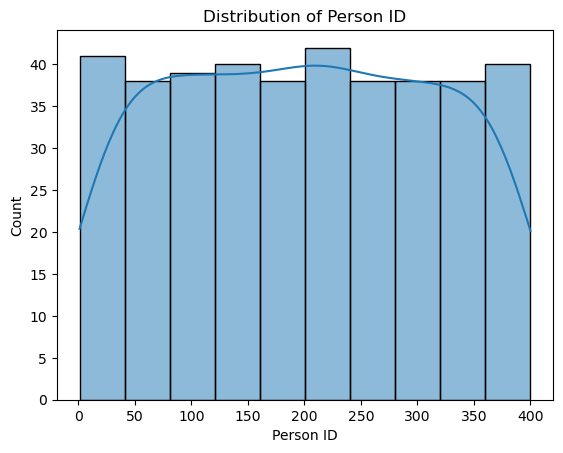

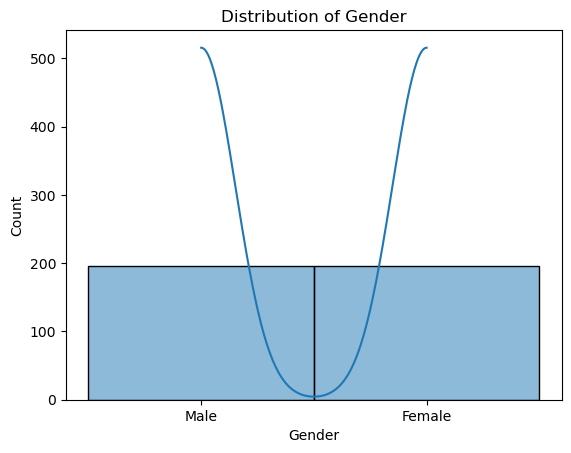

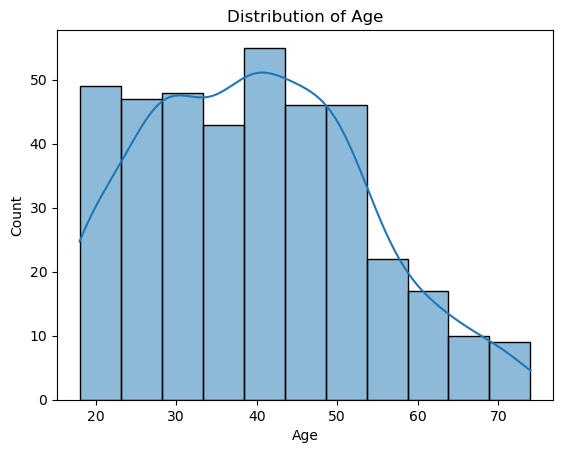

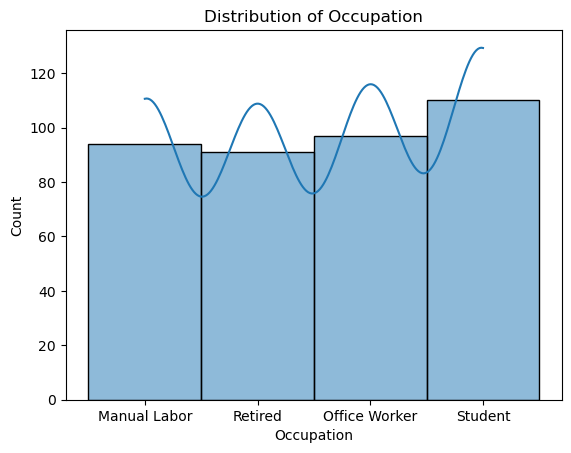

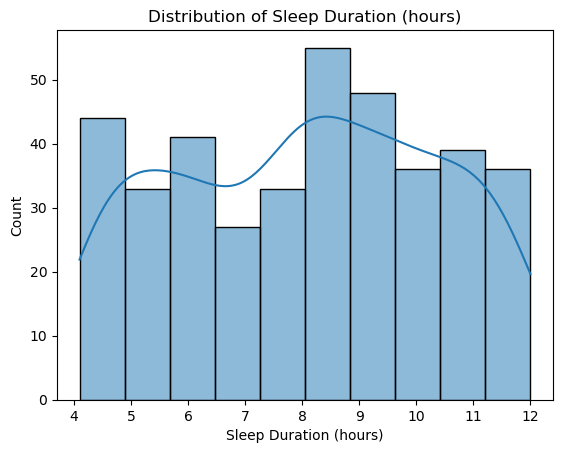

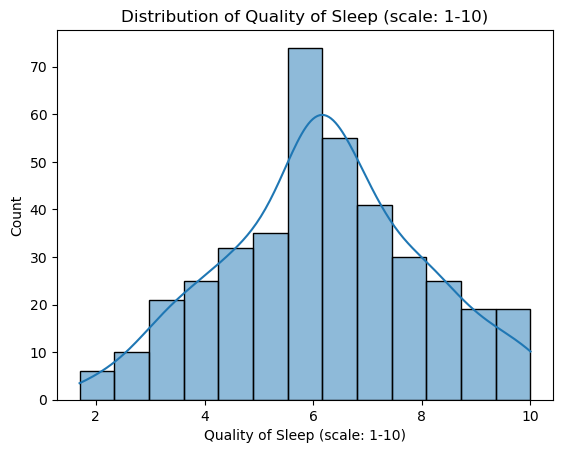

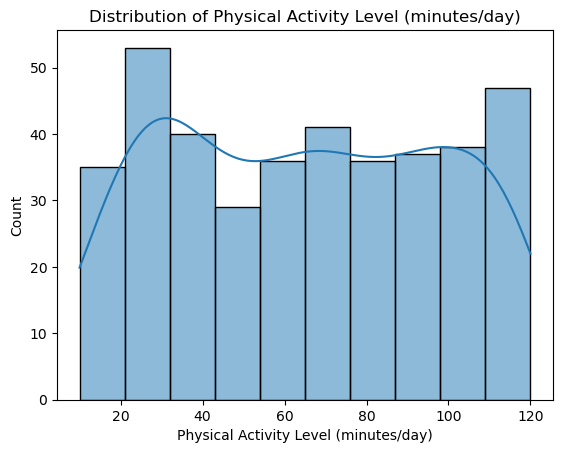

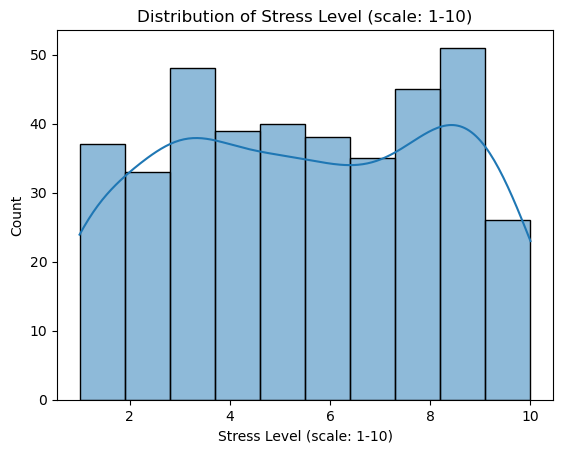

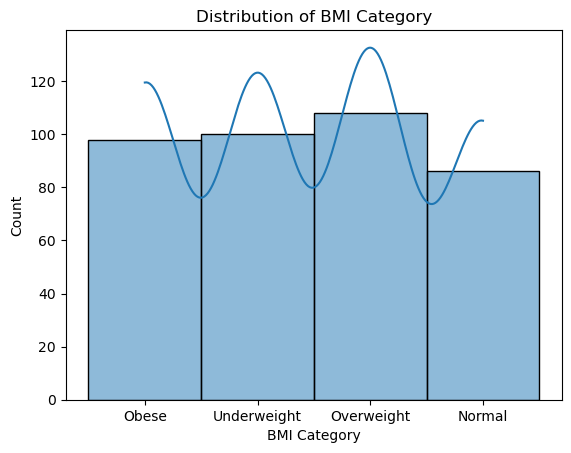

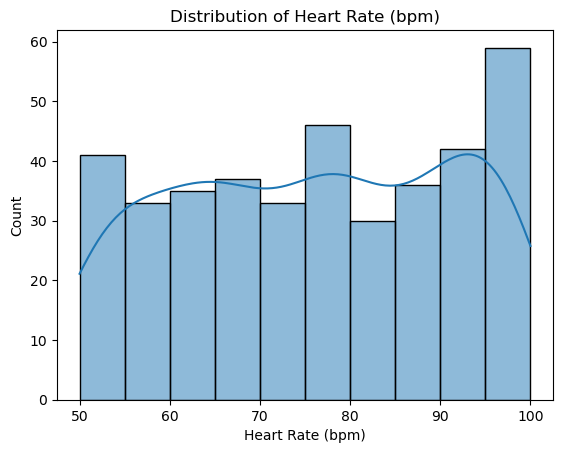

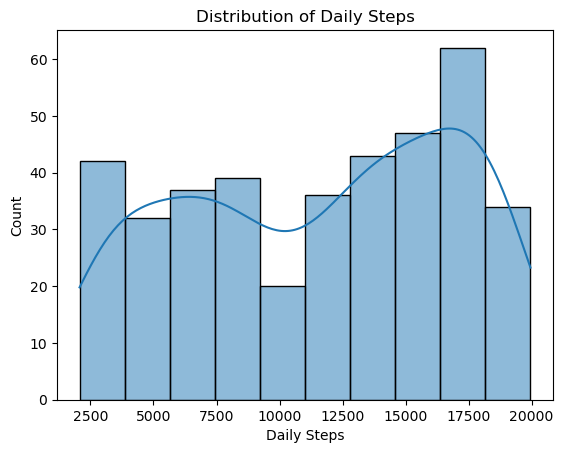

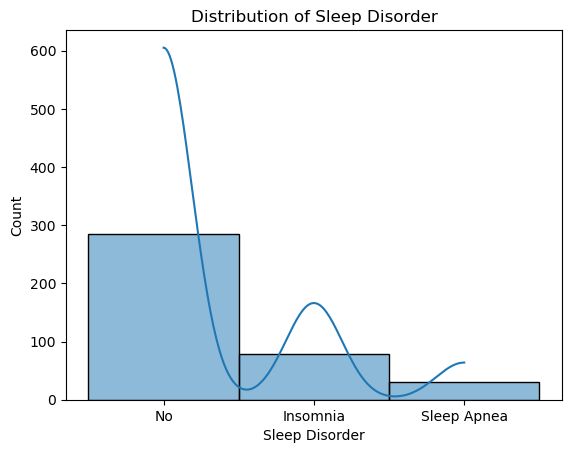

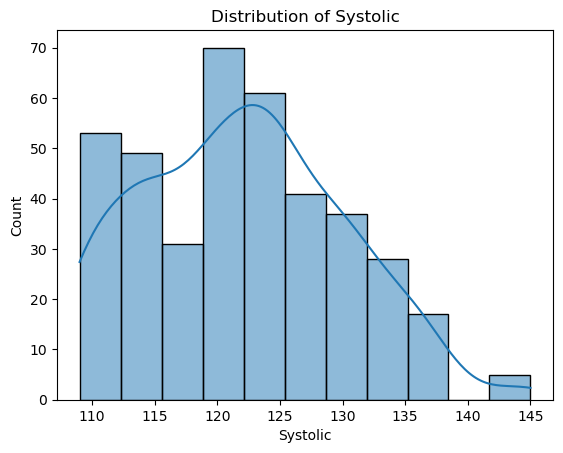

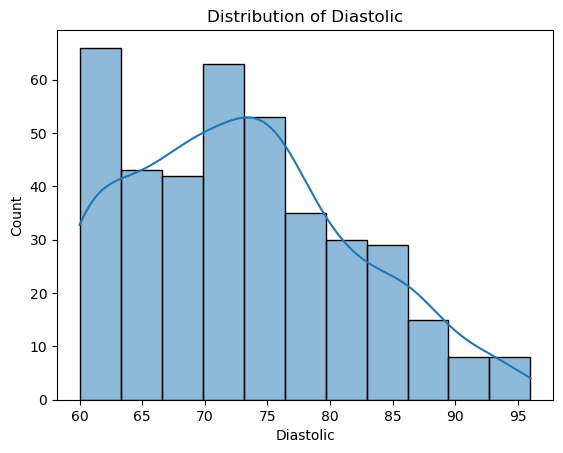

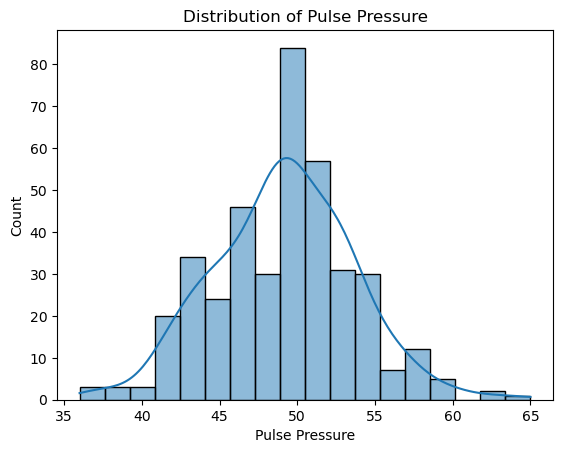

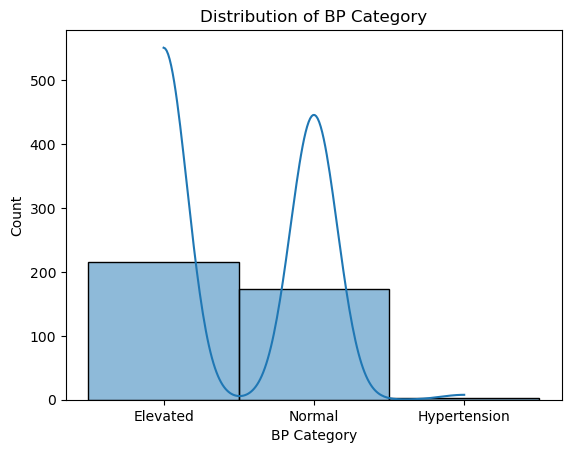

In [27]:
numeric_cols=df1.loc[:, df1.columns != "Blood Pressure (systolic/diastolic)"]

for col in numeric_cols:
    sns.histplot(df1[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

C:\Users\Nagham\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


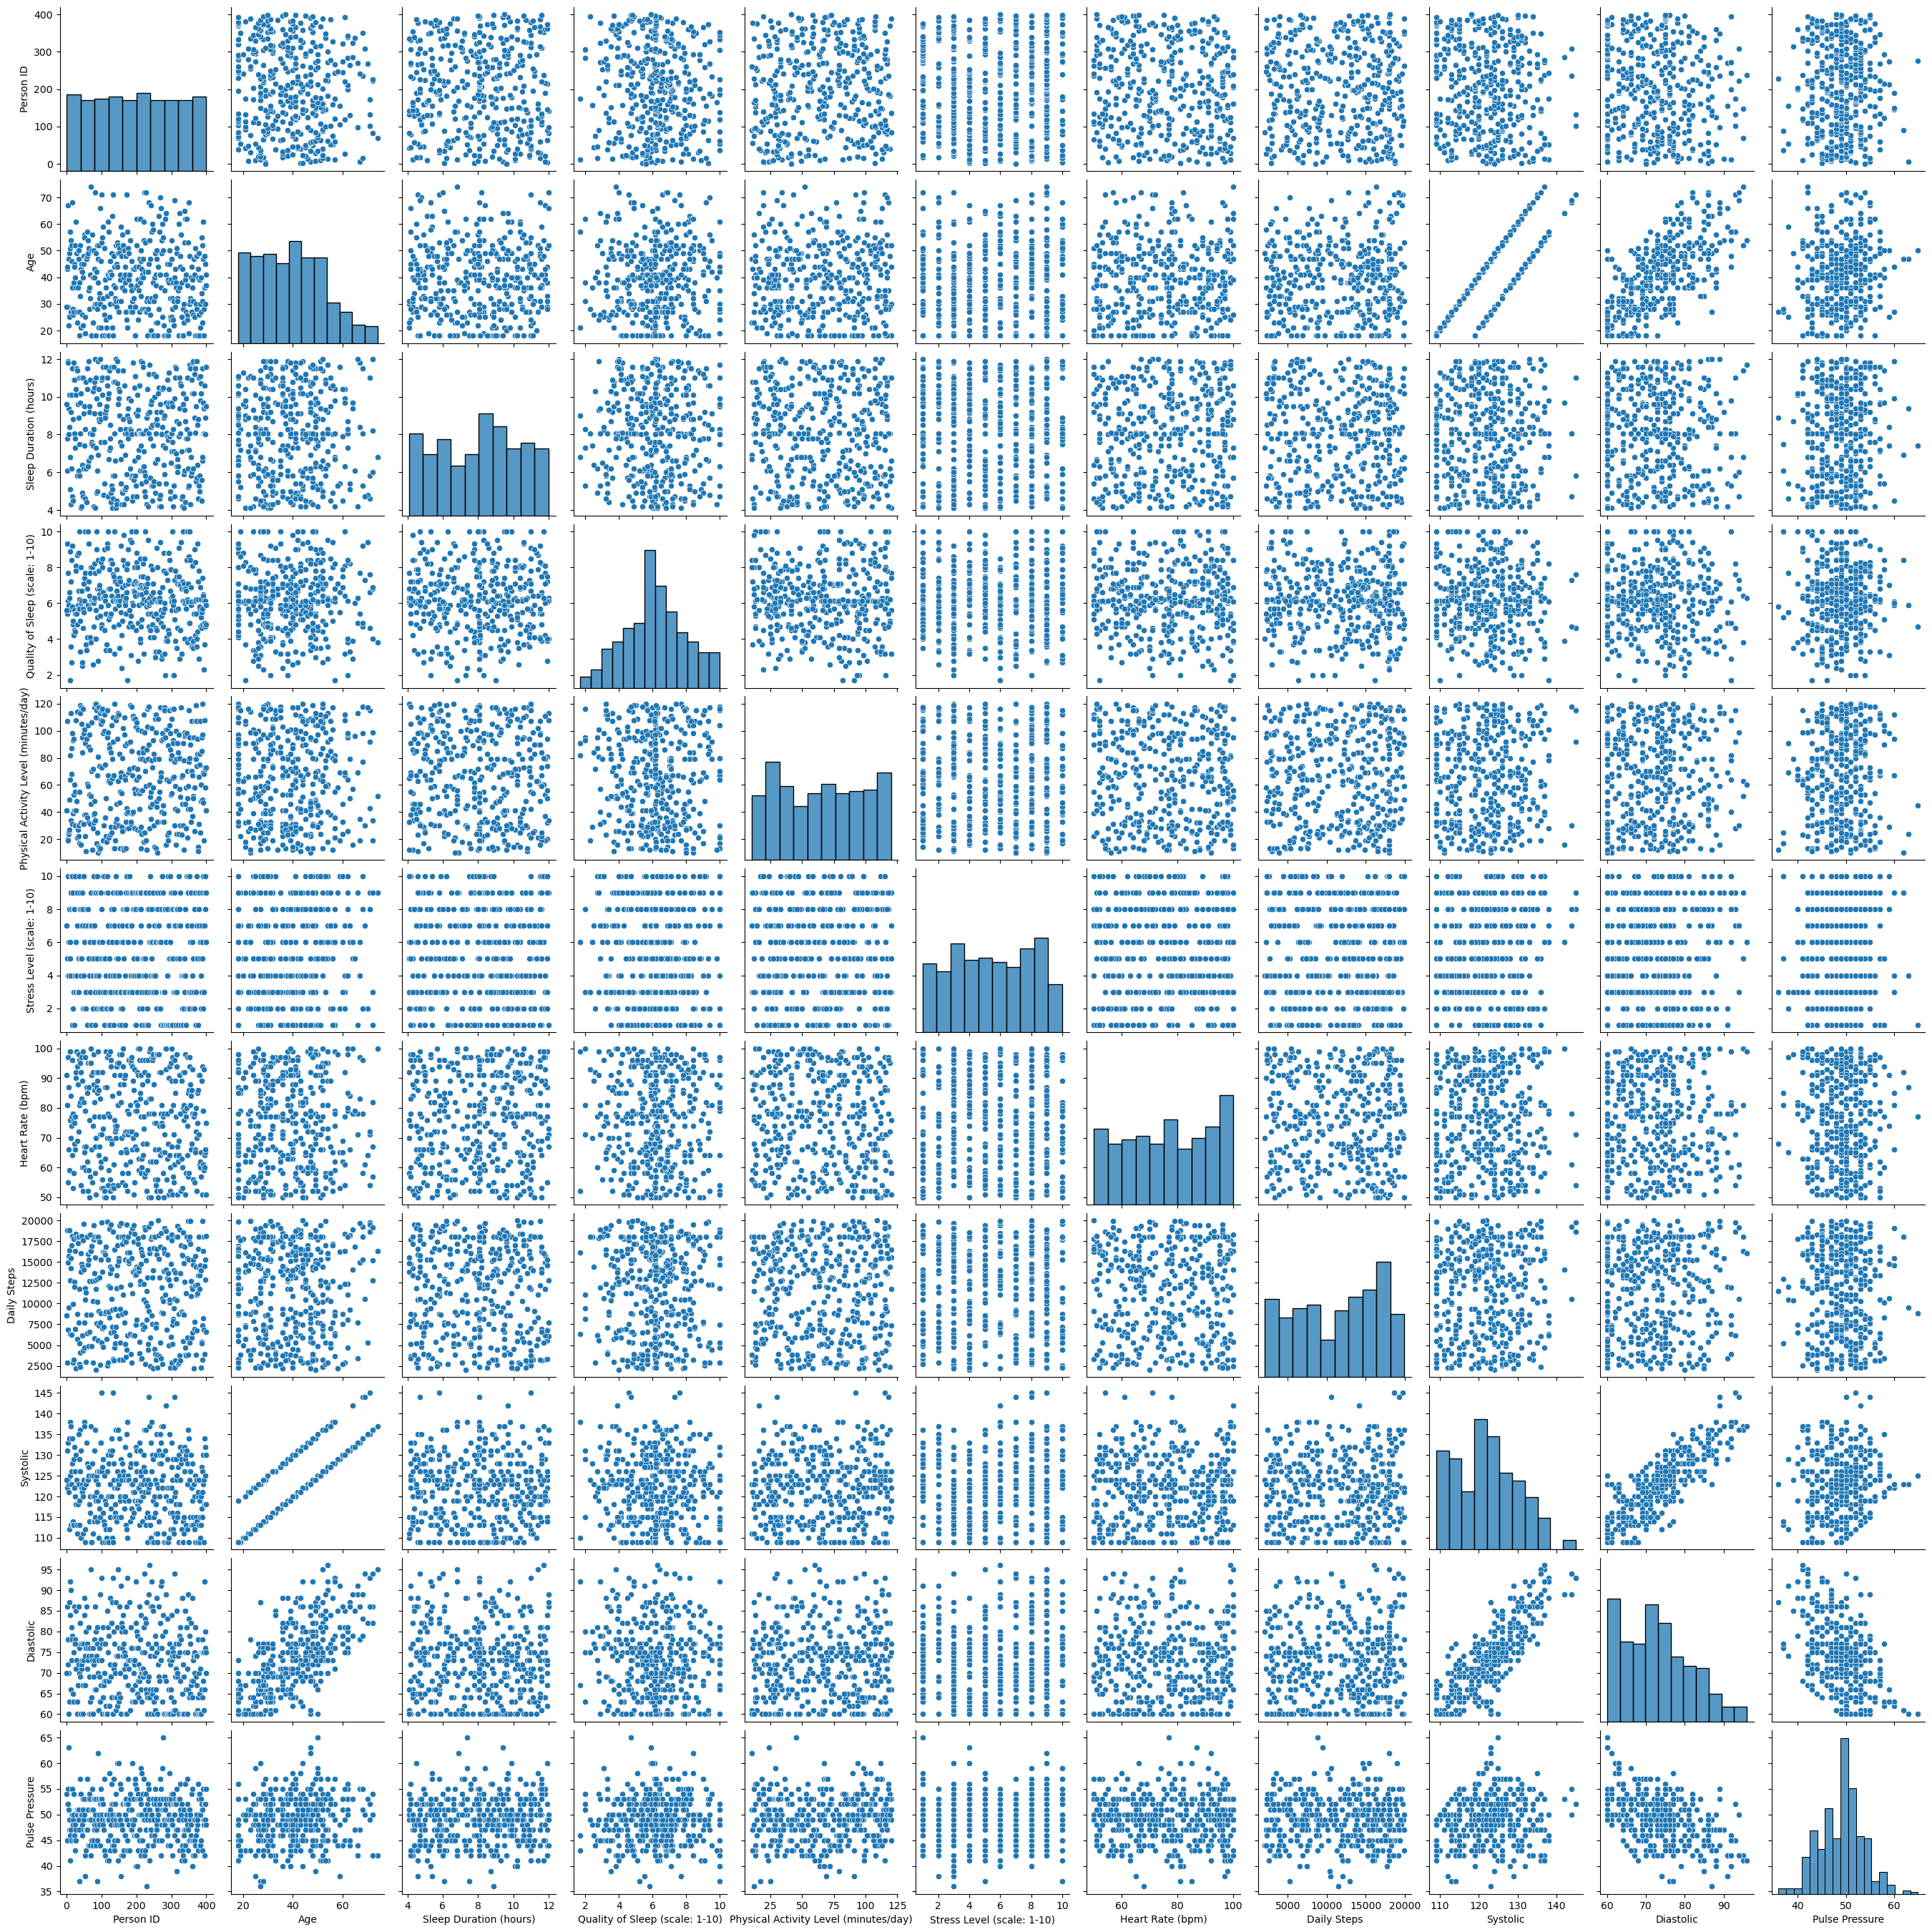

In [28]:
sns.pairplot(numeric_cols)
plt.show()

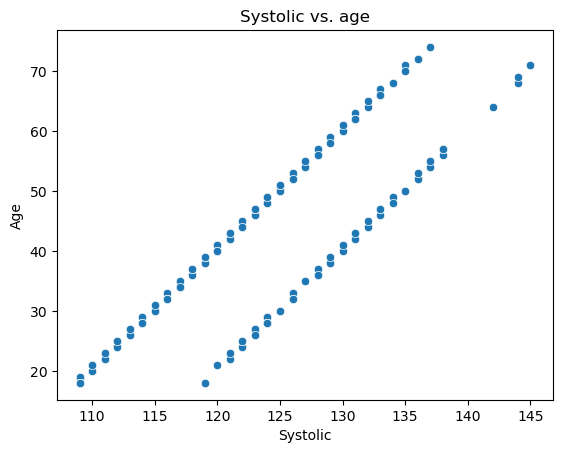

In [29]:
# Scatter plot example: Sleep Duration vs. Stress Level
sns.scatterplot(x='Systolic', y='Age', data=df3 )
plt.title("Systolic vs. age")
plt.show()

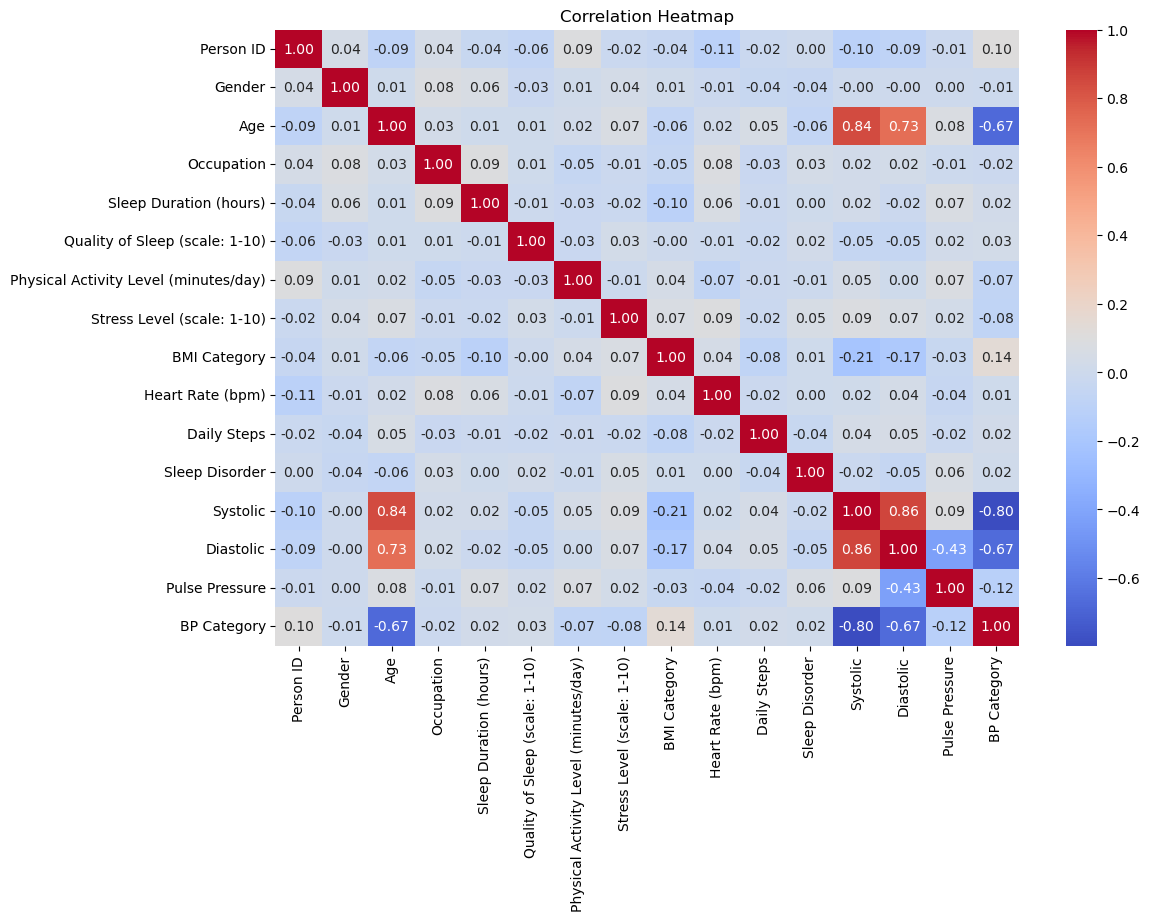

In [30]:
# 1. Exploratory Data Analysis (EDA)
# Correlation heatmap
numeric_cols1 = df3.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols1.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [31]:
# 2. Data Aggregation and Filtering
# Group by Gender and compute mean Sleep Duration
agg_data = df1.groupby('Gender').agg({'Sleep Duration (hours)': 'mean'}).reset_index()
print("Mean Sleep Duration by Gender  :\n", agg_data)

Mean Sleep Duration by Gender  :
    Gender  Sleep Duration (hours)
0  Female                7.922080
1    Male                8.205498


In [32]:
# Filter patients older than 50 and then find average stress levels by BP category
filtered_agg_mean = df1[df1['Age'] > 50].groupby('BP Category').agg({'Stress Level (scale: 1-10)': 'mean'}).reset_index()
print(filtered_agg_mean)

    BP Category  Stress Level (scale: 1-10)
0      Elevated                    5.961538
1  Hypertension                    8.000000


In [33]:
#Group by Occupation and compute mean Sleep Duration,Stress Level ,Physical Activity Level
agg_data = df1.groupby(["Occupation"]).agg({
    "Sleep Duration (hours)": "mean",
    "Stress Level (scale: 1-10)": "mean",
    "Physical Activity Level (minutes/day)": "mean"
}).reset_index()

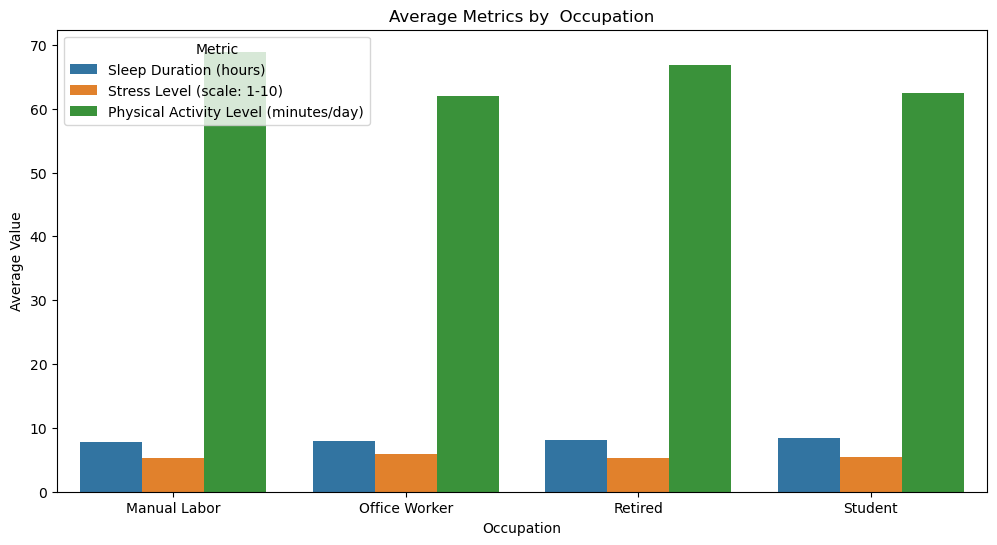

In [34]:
# 3. Visualization of Aggregated Data
plt.figure(figsize=(12, 6))
sns.barplot(
    data=agg_data.melt(id_vars=["Occupation"],
                              var_name="Metric", #var_name="Metric": Creates a column called metric which contains the names of the aggregated metrics ( Sleep Duration (hours), Stress Level (scale: 1-10)).
                              value_name="Average Value"),
    x="Occupation", y="Average Value", hue="Metric"
)
plt.title("Average Metrics by  Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Value")
plt.legend(title="Metric")
plt.show()

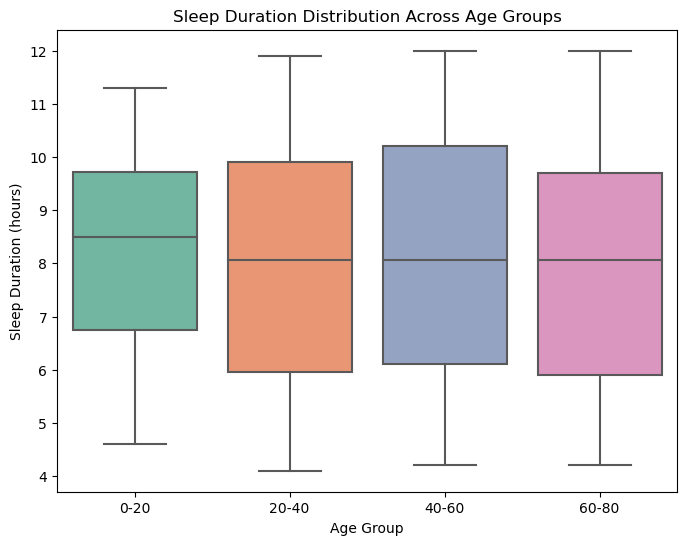

In [35]:
# 6. Distribution of Sleep Duration by Age Groups
df3["Age Group"] = pd.cut(
    df3["Age"], bins=[0, 20, 40, 60, 80], labels=["0-20", "20-40", "40-60", "60-80"]
)
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df3,
    x="Age Group",
    y="Sleep Duration (hours)",
    palette="Set2"
)
plt.title("Sleep Duration Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Sleep Duration (hours)")
plt.show()

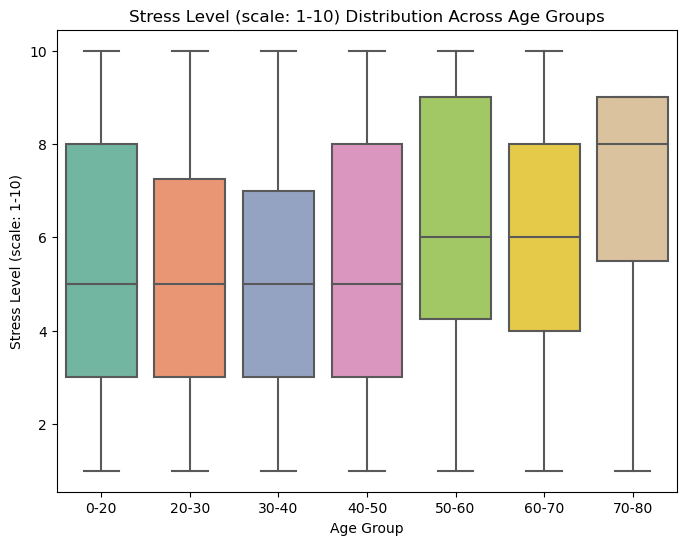

In [36]:
# 6. Distribution of Stress by Age Groups
df3["Age Group"] = pd.cut(
    df3["Age"], bins=[0, 20, 30, 40, 50,60,70,80], labels=["0-20", "20-30", "30-40", "40-50","50-60","60-70","70-80"]
)
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df3,
    x="Age Group",
    y="Stress Level (scale: 1-10)",
    palette="Set2"
)
plt.title("Stress Level (scale: 1-10) Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Stress Level (scale: 1-10)")
plt.show()

Frequency of Sleep Disorders:
Sleep Disorder
No             284
Insomnia        78
Sleep Apnea     30
Name: count, dtype: int64


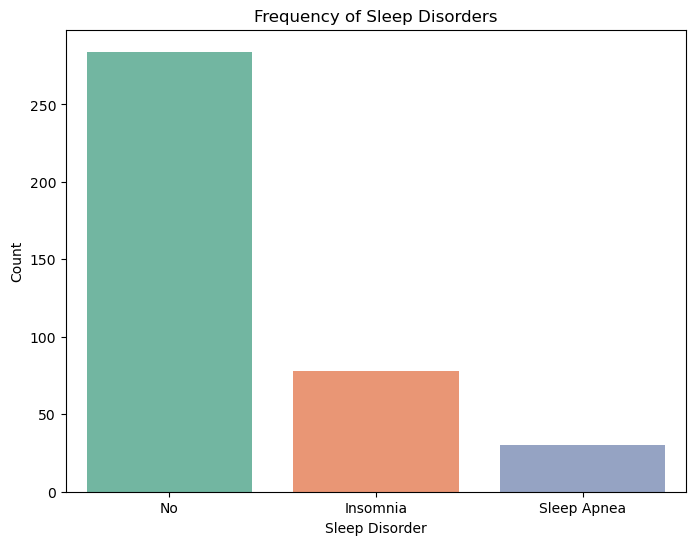

In [37]:

sleep_disorder_column = 'Sleep Disorder'

# Frequency count of sleep disorders
count_dis = df1[sleep_disorder_column].value_counts()


print("Frequency of Sleep Disorders:")
print(count_dis)

# Bar plot of sleep disorder frequency
plt.figure(figsize=(8, 6))
sns.barplot(
    x=count_dis.index,
    y=count_dis.values,
    palette="Set2"
)
plt.title("Frequency of Sleep Disorders")
plt.xlabel("Sleep Disorder")
plt.ylabel("Count")

plt.show()

Average Metrics by Sleep Disorder Status:
  Sleep Disorder  Sleep Duration (hours)  Quality of Sleep (scale: 1-10)  \
0       Insomnia                8.134187                        6.131113   
1             No                8.019424                        6.193626   
2    Sleep Apnea                8.300740                        6.314845   

   Stress Level (scale: 1-10)  Physical Activity Level (minutes/day)  \
0                    5.294872                              60.166667   
1                    5.503521                              67.714789   
2                    5.966667                              50.766667   

   Heart Rate (bpm)   Daily Steps        Age  
0         75.794872  12284.987179  40.589744  
1         76.000000  11337.306338  39.556338  
2         75.900000  12055.100000  36.666667  


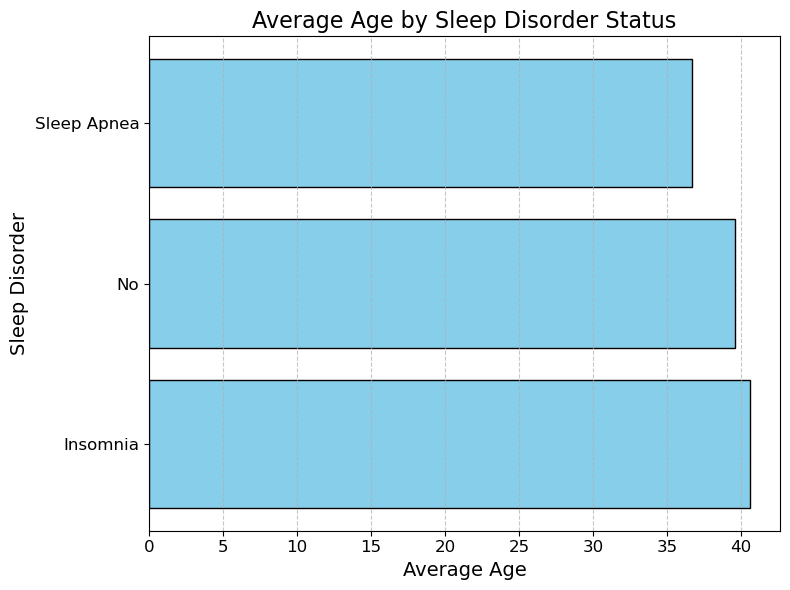

In [38]:
# Calculate average metrics by Sleep Disorder status
dis_agg = df1.groupby("Sleep Disorder").agg({
    "Sleep Duration (hours)": "mean",
    "Quality of Sleep (scale: 1-10)": "mean",
    "Stress Level (scale: 1-10)": "mean",
    "Physical Activity Level (minutes/day)": "mean",
    "Heart Rate (bpm)": "mean",
    "Daily Steps": "mean",
    "Age": "mean"


}).reset_index()
print("Average Metrics by Sleep Disorder Status:")
print(dis_agg)
# Filter to visualize only the Age column
plt.figure(figsize=(8, 6))
plt.barh(dis_agg["Sleep Disorder"], dis_agg["Age"], color='skyblue', edgecolor='black')
plt.title('Average Age by Sleep Disorder Status', fontsize=16)
plt.xlabel('Average Age', fontsize=14)
plt.ylabel('Sleep Disorder', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Aggregated Blood Pressure Metrics by BP Category:
    BP Category Systolic                  Diastolic               
                     min  max        mean       min max       mean
0      Elevated      121  144  127.669767        60  96  78.079070
1  Hypertension      144  145  144.666667        93  94  93.333333
2        Normal      109  120  114.678161        60  79  66.155172


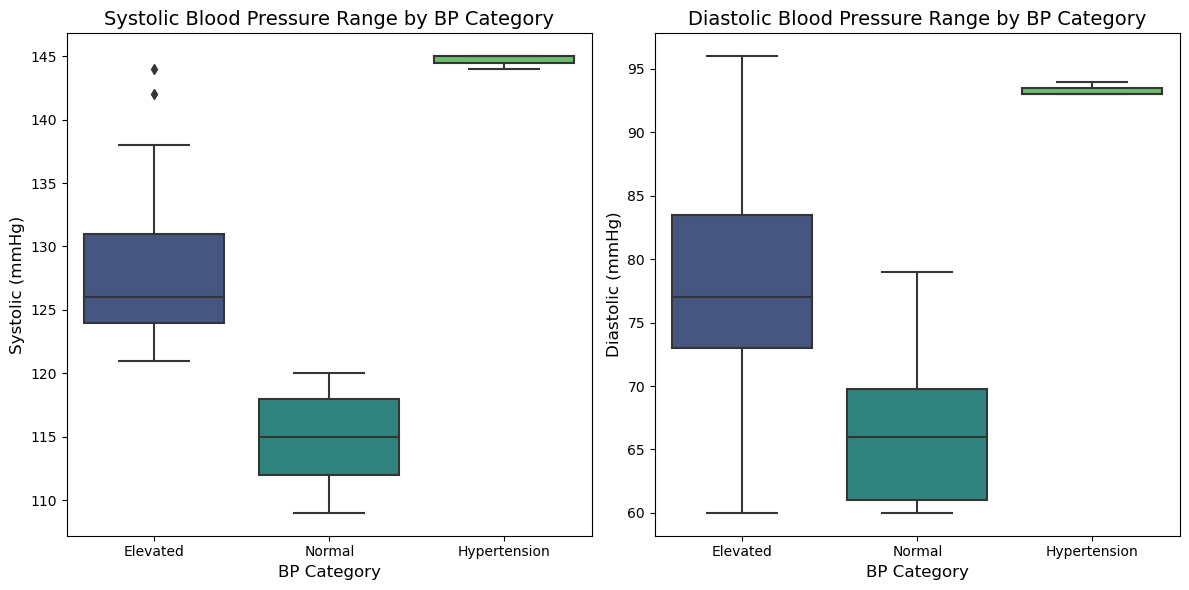

In [39]:

# Aggregating systolic and diastolic blood pressure by BP category
bp_agg = df1.groupby("BP Category").agg({
    "Systolic": ["min", "max", "mean"],
    "Diastolic": ["min", "max", "mean"]
}).reset_index()

print("Aggregated Blood Pressure Metrics by BP Category:")
print(bp_agg)

# Visualizing the range of blood pressure using a box plot
plt.figure(figsize=(12, 6))

# Systolic Blood Pressure
plt.subplot(1, 2, 1) # it makes space between the two diagrams
sns.boxplot(x="BP Category", y="Systolic", data=df1, palette="viridis")
plt.title("Systolic Blood Pressure Range by BP Category", fontsize=14)
plt.xlabel("BP Category", fontsize=12)
plt.ylabel("Systolic (mmHg)", fontsize=12)


# Diastolic Blood Pressure
plt.subplot(1, 2, 2)
sns.boxplot(x="BP Category", y="Diastolic", data=df1, palette="viridis")
plt.title("Diastolic Blood Pressure Range by BP Category", fontsize=14)
plt.xlabel("BP Category", fontsize=12)
plt.ylabel("Diastolic (mmHg)", fontsize=12)


plt.tight_layout()
plt.show()


In [40]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Columns to normalize (numeric features)
numeric_features = ['Daily Steps', 'Sleep Duration (hours)',
                     'Physical Activity Level (minutes/day)', 'Heart Rate (bpm)']

# Pipeline for numeric data
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Create ColumnTransformer: apply numeric_transformer only to numeric_features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough' 
)

#  Apply transformations
transformed_features = preprocessor.fit_transform(df1)

#  Create DataFrame with new column names
transformed_df = pd.DataFrame(transformed_features, columns=preprocessor.get_feature_names_out())

#  Save to JSON
transformed_df.to_json(r"C:\Users\Nagham\Downloads\Datascience Programming\proj\sleepdata_normalized_pipeline.json")

#  Read again from JSON (to confirm)
df4 = pd.read_json(r"C:\Users\Nagham\Downloads\Datascience Programming\proj\sleepdata_normalized_pipeline.json")

print(df4.head())

   num__Daily Steps  num__Sleep Duration (hours)  \
0          0.361746                     0.696203   
1          0.932704                     0.253165   
2          0.044156                     0.468354   
3          0.269353                     0.987342   
4          0.719803                     0.974684   

   num__Physical Activity Level (minutes/day)  num__Heart Rate (bpm)  \
0                                    0.281818                   0.82   
1                                    0.281818                   0.62   
2                                    0.881818                   0.62   
3                                    0.090909                   0.10   
4                                    0.081818                   0.94   

   remainder__Person ID remainder__Gender  remainder__Age  \
0                     1              Male              29   
1                     2            Female              43   
2                     3              Male              44   
3         

In [41]:
# Drop the blood pressure column
df_reduced = df4[['remainder__Systolic', 'remainder__Diastolic', 'remainder__Sleep Disorder']]

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
#  Handling Imbalanced Data
# Oversampling using SMOTE
X = df_reduced[['remainder__Systolic', 'remainder__Diastolic']]  # Features
y = df_reduced['remainder__Sleep Disorder']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

import pandas as pd
df_smote = pd.DataFrame(X_resampled, columns=['Systolic', 'Diastolic'])
df_smote['Sleep Disorder'] = y_resampled.values

# Step 6: Save the DataFrame to a JSON file
df_smote.to_json("resampled_sleep_data.json", orient="records", indent=4)


Class Distribution After SMOTE:
remainder__Sleep Disorder
No             197
Insomnia       197
Sleep Apnea    197
Name: count, dtype: int64


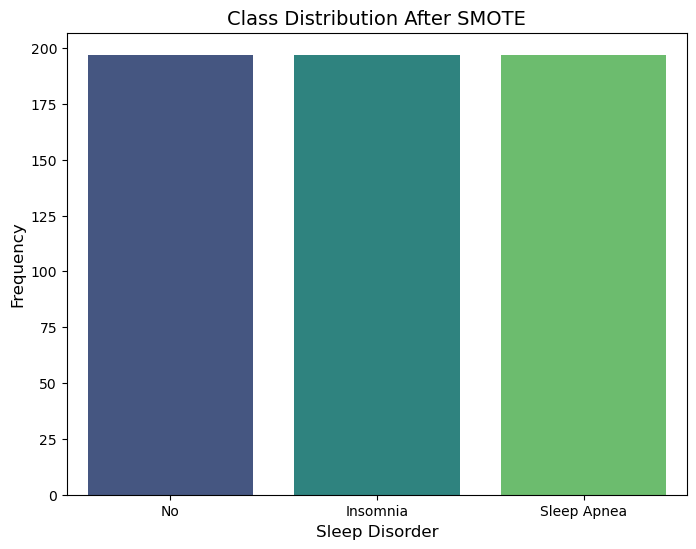

In [42]:
# Visualize the distribution after SMOTE
new_class_dist = y_resampled.value_counts()

print("\nClass Distribution After SMOTE:")
print(new_class_dist)

# Initialize a new figure for the plot
plt.figure(figsize=(8, 6))

# Create a bar plot for the new class distribution
sns.barplot(x=new_class_dist.index, y=new_class_dist.values, palette='viridis')
plt.title('Class Distribution After SMOTE', fontsize=14)
plt.xlabel('Sleep Disorder', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.show()


In [ ]:
import pandas as pd
import multiprocessing

data=pd.read_csv(r"C:\Users\Nagham\Downloads\Datascience Programming\proj\new.csv")
data.to_json(r"C:\Users\Nagham\Downloads\Datascience Programming\proj\original_data.json")

def read_sleep_json(filename):
    
    return pd.read_json(filename)

if __name__ == "__main__":
    file1 = r"C:\Users\Nagham\Downloads\Datascience Programming\proj\original_data.json"
    file2 = r"C:\Users\Nagham\Downloads\Datascience Programming\proj\resampled_sleep_data.json"
    
    pool = multiprocessing.Pool(processes=2)

    df1_result = pool.apply_async(read_sleep_json, args=(file1,))
    df2_result = pool.apply_async(read_sleep_json, args=(file2,))

    pool.close()
    pool.join()

    combined_df = pd.concat([df1_result.get(), df2_result.get()], axis=0, ignore_index=True)
    print("✅ Combined data shape:", combined_df.shape)
    print(combined_df.head())

In [ ]:
# Web Scraping using PyQuery and requests

import requests
from pyquery import PyQuery as pq
import json

def scrape_sleep_tips_pyquery():
    url = "https://www.sleepfoundation.org/sleep-hygiene"
    print(f" Fetching content from: {url}")
    
    try:
        response = requests.get(url)
        if response.status_code == 200:
            doc = pq(response.text)
            tips = []

            # Extract list items from the first visible list 
            for li in doc("ul li, ol li").items():
                tip = li.text()
                if tip:
                    tips.append(tip)

            # Save to JSON
            with open("sleep_tips_pyquery.json", "w") as f:
                json.dump(tips[:10], f, indent=2)

            print(" Sleep tips saved to sleep_tips_pyquery.json")
            for i, tip in enumerate(tips[:5], 1):
                print(f"{i}. {tip}")
        else:
            print(" Failed to fetch page, status code:", response.status_code)
    except Exception as e:
        print(" Error scraping tips:", e)

if _name_ == "_main_":
    scrape_sleep_tips_pyquery()